<a href="https://colab.research.google.com/github/unluckid/model/blob/main/img_generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설정

In [1]:
import gdown
import numpy as np
import cv2
import os
import shutil

# 비디오 파일 다운로드
file_id = '181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, '/content/video.zip', quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu
From (redirected): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu&confirm=t&uuid=600e0efb-e892-4a65-8ac9-dd7738a9d7b6
To: /content/video.zip
100%|██████████| 1.45G/1.45G [00:11<00:00, 121MB/s]


'/content/video.zip'

In [2]:
import zipfile


zip_file_path = '/content/video.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"압축이 {extract_path}에 해제되었습니다.")

압축이 /content/에 해제되었습니다.


In [3]:
os.makedirs("train/", exist_ok=True)
os.makedirs("val/", exist_ok=True)

In [4]:
import random
import matplotlib.pyplot as plt
class Image_propressing:
    def __init__(self):
        #  폴더 경로
        self.video_path = "video/"  # 비디오 폴더
        self.nature_img_folder_path = "nature/"  # 전처리 이전 폴더
        self.model1_img_folder_path = "model1/"  # 기본 모델 폴더
        self.model2_img_folder_path = "model2/"  # 캐니 모델 폴더
        self.train_path = "train/"
        self.val_path = "val/"
        self.data = []  # 전처리 전 데이터셋

        self.label = ["_ari", "_smallthe", "_corki", "_velkoz", "_thresh", "_gragas", "_atrox", "_kogmaw", "_kasus", "_graves"]  # 10개의 이미지 폴더에 대한 값
        self.model_data1 = []  # 기본 이미지 모델 데이터셋
        self.model_data2 = []  # 캐니 이미지 모델 데이터셋
        self.valimgs = []    # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.trainimgs = []  # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.train_save = 3
        self.val_save = 11
    def reset_folder(self):
        shutil.rmtree(self.train_path)
        shutil.rmtree(self.val_path)
        print("폴더 초기화")
    def set_folder(self):
        os.makedirs(self.video_path, exist_ok=True)
        os.makedirs(self.train_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model2_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model2_img_folder_path, exist_ok=True)
        for label in self.label:                   # 10개의 하위 폴더 생성 코드 추가 작성
            os.makedirs(self.video_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model2_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model2_img_folder_path + label, exist_ok=True)
        print("setting folder")

    def save_train(self):
        for label in self.label:
            for file_name in os.listdir(self.video_path + label):
                file_path = os.path.join(self.video_path + label, file_name)
                video_capture = cv2.VideoCapture(file_path) # 동영상 로드
                if not video_capture.isOpened():
                    print("error_00: " + label + ": 동영상 없음 ")
                frame_count, train_count, val_count = 0, 0, 0
                fps = video_capture.get(cv2.CAP_PROP_FPS)  # fps 설정
                train_save = int(fps * self.train_save/10)  # 훈련에 사용될 이미지 정리  3초 간격으로 작성
                val_save = int(fps * self.val_save/10)   # 훈련에 사용될 이미지 정리  11초 간격으로 작성
                while True:
                    ret, frame = video_capture.read()
                    if not ret:
                        break  # 프레임이 더 이상 없으면 반복문 종료
                    # 프레임 파일 이름 형식 지정 및 저장
                    if frame_count % train_save == 0:
                        frame_filename = os.path.join(self.train_path + self.nature_img_folder_path + label, f"{file_name}_{train_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        train_count += 1
                    elif frame_count % val_save == 0:  # elif 이미지 중복 제거
                        frame_filename = os.path.join(self.val_path + self.nature_img_folder_path + label, f"{file_name}_{val_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        val_count += 1
                    frame_count += 1
                    # 자원 해제
                video_capture.release()

    # 이미지의 폴더 패스를 받고 이를 self.imgs 에 저장한다.
    def set_img(self, model): #이미지 이름을 모두 따서 self.imgs에 저장해둠
        self.valimgs = []
        self.trainimgs = []
        for label in self.label:
            for img in os.listdir(self.val_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.valimgs.append([self.val_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
        for label in self.label:
            for img in os.listdir(self.train_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.trainimgs.append([self.train_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
    """
    # 이미지 로테이트 함수
    def made_model1_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.val_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        for path in self.trainimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.train_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        # return self.model_data1    # data리스트 반환
      """
    def made_model2_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0] + path[1] + path[2]+"/"+path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0]+self.model2_img_folder_path+path[2]+"/"+path[3], img_c)
        for path in self.trainimgs:
            image = cv2.imread(path[0] + path[1] + path[2] + "/" + path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0] + self.model2_img_folder_path + path[2]+"/" + path[3], img_c)
        print("생성 완료")
    def show_random_images(self):

      images = []
      folder_path = os.path.join("train", "nature", "_ari")
      for img in os.listdir(folder_path):
          if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
              images.append(os.path.join(folder_path, img))
      random_images = random.sample(images, 5)
      fig, axes = plt.subplots(1, 5, figsize=(20, 5))
      for i, img_path in enumerate(random_images):
          img = cv2.imread(img_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          axes[i].imshow(img)
          axes[i].axis('off')
      plt.show()

In [6]:
IMGP = Image_propressing()
IMGP.reset_folder()  # 폴더 초기화
IMGP.set_folder()
IMGP.save_train()
#IMGP.made_model1_dataset() # 로테이트 이미지 생성자 사용 안함
#IMGP.made_model2_dataset() # canny이미지 생성자 사용 안함



폴더 초기화
setting folder


In [7]:
IMGP.train_path = "test1/"
IMGP.val_path = "test2/"
IMGP.train_save = 4
IMGP.val_save = 13

IMGP.set_folder()
IMGP.save_train()


setting folder


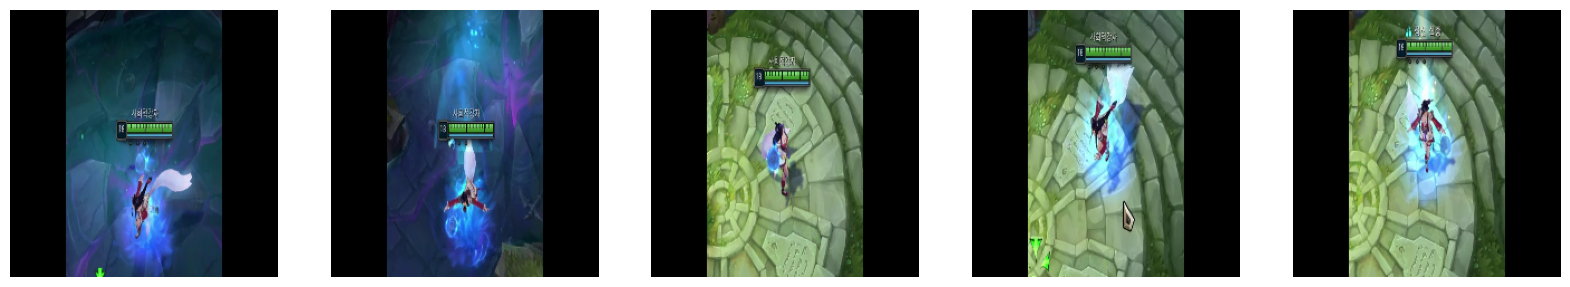

In [ ]:
IMGP = Image_propressing()
IMGP.show_random_images()

In [ ]:

folder_path = '/content/train'
folder_path1 = '/content/val'
zip_file_path = '/content/train.zip'
zip_file_path1 = '/content/val.zip'
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)
shutil.make_archive(zip_file_path1.replace('.zip', ''), 'zip', folder_path1)

'/content/val.zip'

In [8]:
folder_path = '/content/test1'
folder_path1 = '/content/test2'
zip_file_path = '/content/test1.zip'
zip_file_path1 = '/content/test2.zip'
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)
shutil.make_archive(zip_file_path1.replace('.zip', ''), 'zip', folder_path1)

'/content/test2.zip'